---
# 📈🍭Integration of basic plots e.g. stem/lollipop plot 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## functions from chrov
from chrov.viz.figure import plot_with_chroms

In [ ]:
# parameters
input_dir_path='../modules/inputs'
output_dir_path='outputs'

In [ ]:
## set the current directory to 'examples'
import os
if len(set(['modules','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [4]:
# cytobands to plot the chromosome
cytobands=pd.read_table(f'{input_dir_path}/cytobands.tsv',index_col=[0])
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
0,1,121700001,125100000,1,2300000,p36.33,gneg,p,chr1p


**Demo data**

In [5]:
genes=pd.read_table(f'{input_dir_path}/genes.tsv',index_col=[0])
genes=genes.assign(
    value=lambda df: df['gene start']/df.groupby('chromosome')['gene start'].transform(max)
    )
genes.head(1)

,gene symbol,chromosome,gene start,value
0,ATAD3B,1,1471765,0.005913


In [6]:
## input parameters
output_dir_path='outputs/'
test=False
# test=True

In [7]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)
from os import makedirs
makedirs(output_dir_path,exist_ok=True)

## Genome

**Demo data**

In [8]:
data=(genes.groupby('chromosome',as_index=False).apply(lambda df: df.sample(1,random_state=1))).reset_index(drop=True)
data

,gene symbol,chromosome,gene start,value
0,SCYL3,1,169849631,0.682384
1,CLRN3,10,127877841,0.956998
2,MSANTD4,11,105995623,0.788784
3,USP5,12,6852148,0.051435
4,CLDN10,13,95433604,0.834834
5,SERPINA1,14,94376747,0.894341
6,SNX22,15,64151715,0.629419
7,NAE1,16,66802875,0.741788
8,KRT28,17,40792196,0.491001
9,INO80C,18,35452230,0.442284


### linear layout

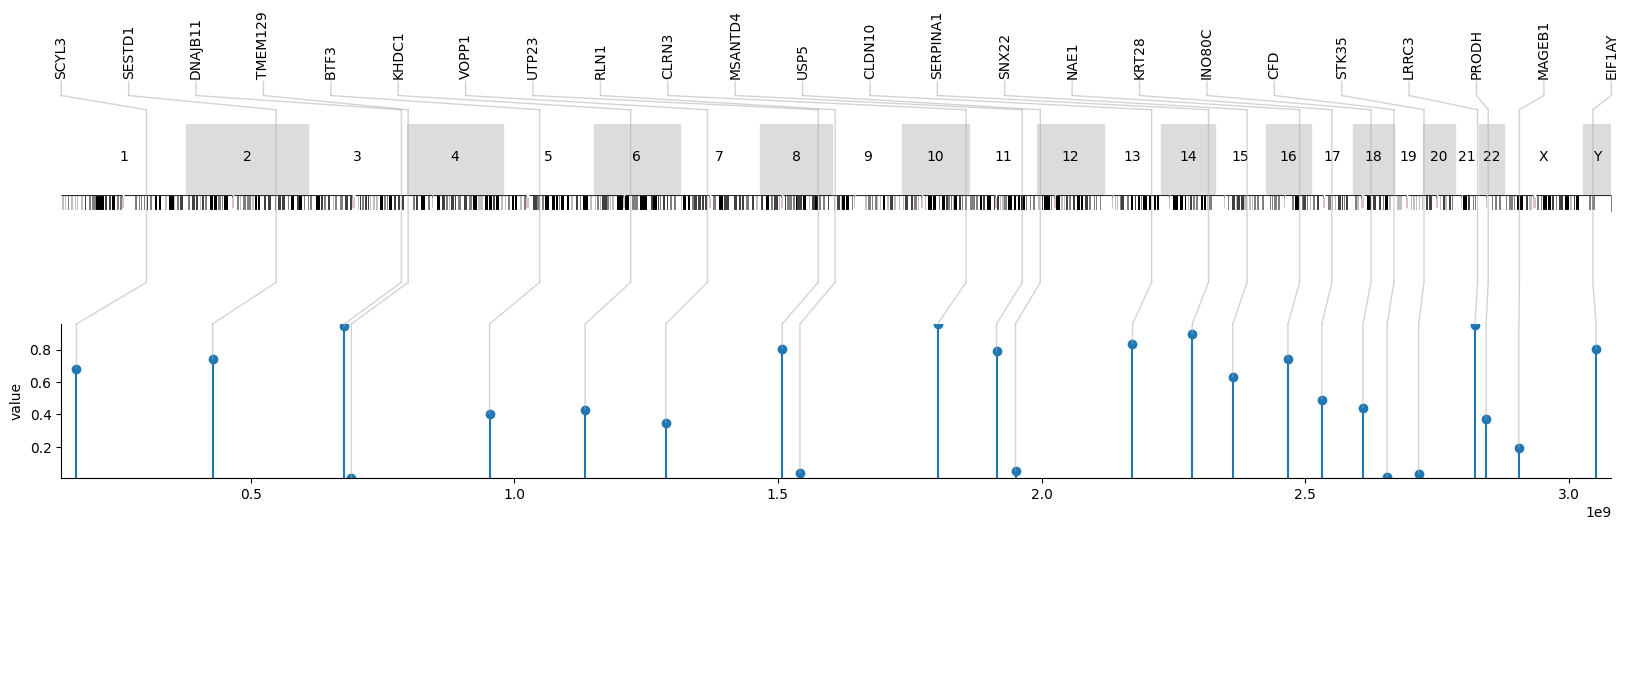

In [9]:
_=plot_with_chroms(
    data=data.copy(),
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    col_label='gene symbol',
    xkind='loci',
    va='bottom',
    off=2,
    offy=-1,
    figsize=[20,2],
    arc=False,
    fig=None,
    kws_seaborn=dict(),
    kws_annot_chroms={},
    kws_annot_labels={},
    )
plt.savefig(f"{output_dir_path}/genome_linear_out.png",bbox_inches='tight')

### polar layout

#### half pie

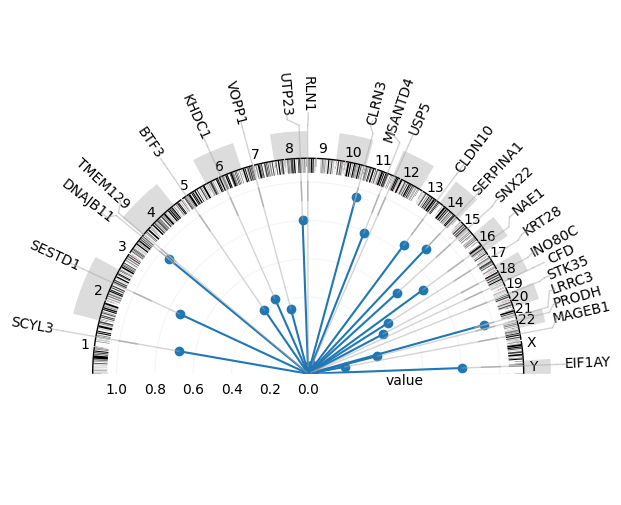

In [10]:
_=plot_with_chroms(
    data=data,
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    col_label='gene symbol',
    # coffy=0.9,
    xkind='loci',
    chrom_y=0,
    arc=True,
    va='center',
    off=0.2,
    offy=0.1,
    fig=None,
    figsize=[5,5],
    kws_seaborn={},
    kws_annot_chroms={},
    kws_annot_labels=dict(),
    )
plt.savefig(f"{output_dir_path}/genome_polar_half_out.png",bbox_inches='tight')

#### full pie

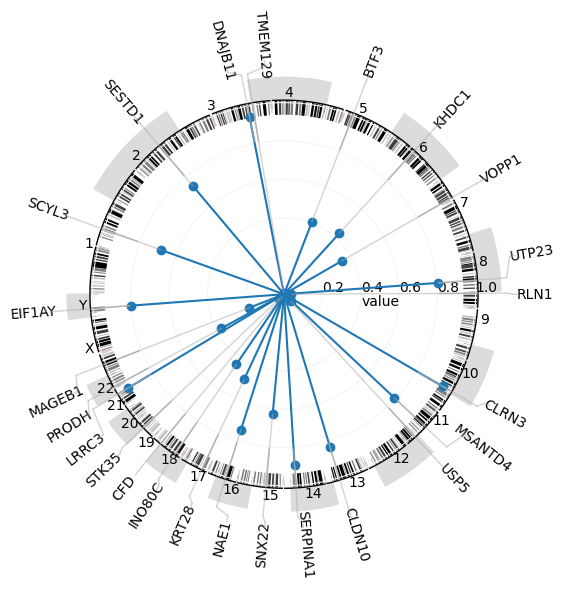

In [11]:
_=plot_with_chroms(
    data=data.copy(),
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    col_label='gene symbol',
    xkind='loci',
    chrom_y=0,
    arc=True,
    va='center',
    off=0.1,
    pi_span=2,
    fig=None,
    figsize=[5,5],
    kws_seaborn=dict(),
    kws_annot_chroms={},
    kws_annot_labels=dict(off_labels_segments=20),
    )
plt.savefig(f"{output_dir_path}/genome_polar_full_out.png",bbox_inches='tight')

## Chromosomes

In [12]:
data=(genes
     ).sample(10,random_state=11)
data

,gene symbol,chromosome,gene start,value
12728,TCF20,22,42160013,0.830453
13007,IMPG2,3,101222546,0.511328
4111,MFAP5,12,8637346,0.064836
17319,SLC13A4,7,135681231,0.853190
3425,TMEM45B,11,129815848,0.966046
19355,FAM236A,X,72938163,0.467490
9033,DOHH,19,3490821,0.059609
12483,MED15,22,20495913,0.403721
16077,H3C1,6,26020451,0.152545
119,PARS2,1,54756898,0.219990


### linear layout

#### Gene names **out**side

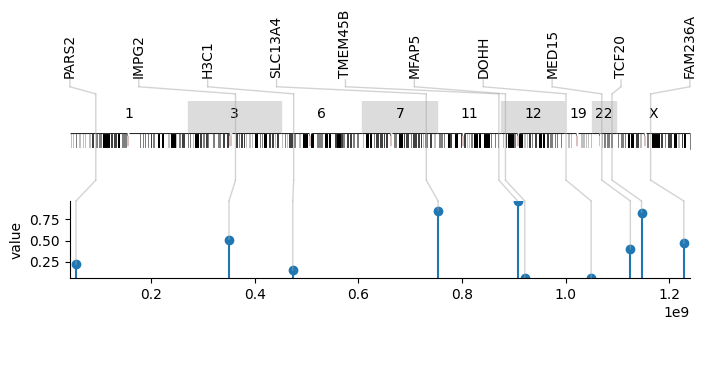

In [13]:
_=plot_with_chroms(
    data=data.copy(),
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    va='bottom',
    col_label='gene symbol',
    xkind='loci',
    chrom_y=0,
    arc=False,
    fig=None,
    off=2,
    offy=-1,
    figsize=[8,1],
    kws_seaborn={},
    kws_annot_chroms={},
    kws_annot_labels={},
    test=True,
    )
plt.savefig(f"{output_dir_path}/chroms_linear_out.png",bbox_inches='tight')

#### Gene names **in**side

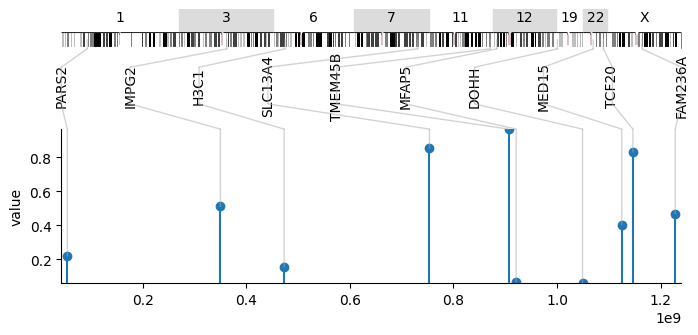

In [14]:
_=plot_with_chroms(
    data=data.copy(),
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    va='bottom',
    col_label='gene symbol',
    xkind='loci',
    chrom_y=0,
    arc=False,
    fig=None,
    off=0.3,
    figsize=[8,2],
    kws_seaborn={},
    kws_annot_chroms={},
    kws_annot_labels={'loc':'in'},
    test=True,
    )
plt.savefig(f"{output_dir_path}/chroms_linear_in.png",bbox_inches='tight')

### polar layout

#### Gene names **out**side

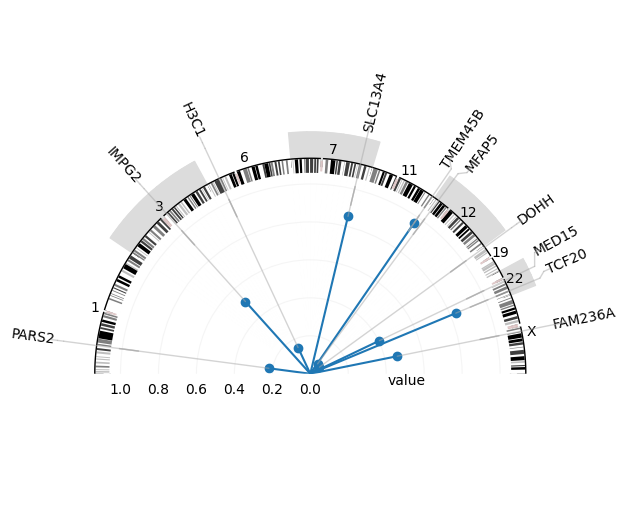

In [15]:
_=plot_with_chroms(
    data=data,
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    col_label='gene symbol',
    # coffy=0.9,
    xkind='loci',
    chrom_y=0,
    arc=True,
    va='center',
    off=0.2,
    offy=0.1,
    figsize=[5,5],
    kws_seaborn={},
    kws_annot_chroms={},
    kws_annot_labels=dict(),
    )
plt.savefig(f"{output_dir_path}/chroms_polar_half_out.png",bbox_inches='tight')

#### Gene names **in**side

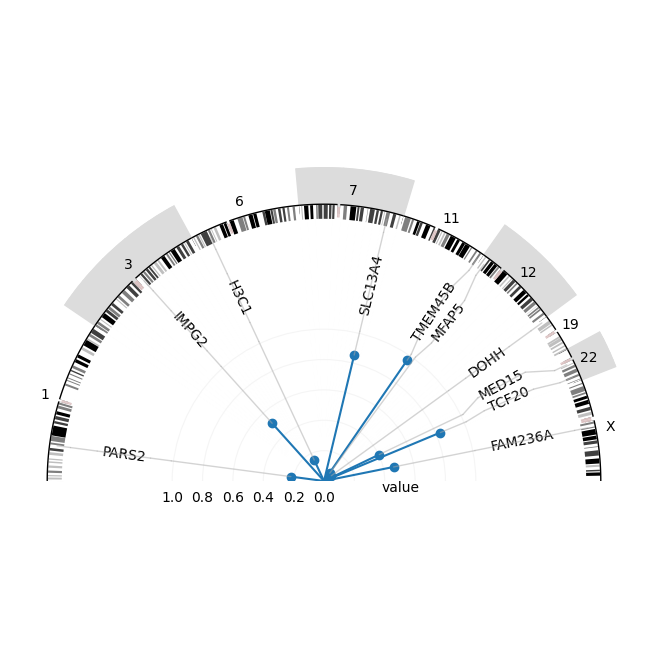

In [16]:
_=plot_with_chroms(
    data=data,
    cytobands=cytobands,
    kind='stem',
    colx='gene start',
    coly='value',
    col_label='gene symbol',
    # coffy=0.9,
    xkind='loci',
    chrom_y=0,
    arc=True,
    va='center',
    off=0.8,
    offy=0.4,
    figsize=[4,4],
    kws_seaborn={},
    kws_annot_chroms={},
    kws_annot_labels=dict(loc='in'),
    )
plt.savefig(f"{output_dir_path}/chroms_polar_half_in.png",bbox_inches='tight')